In [2]:
import pandas as pd

In [25]:
df = pd.read_csv("car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [26]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [27]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [29]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [30]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le_buy= LabelEncoder()
le_m= LabelEncoder()
le_d= LabelEncoder()
le_l= LabelEncoder()
le_s= LabelEncoder()

In [32]:
df['buying_n'] = le_buy.fit_transform(df['buying'])
df['maint_n'] = le_m.fit_transform(df['maint'])
df['doors_n'] = le_d.fit_transform(df['doors'])
df['persons_n'] = le_d.fit_transform(df['persons'])
df['lug_boot_n'] = le_d.fit_transform(df['lug_boot'])
df['safty_n'] = le_d.fit_transform(df['safety'])
df['class_n'] = le_d.fit_transform(df['class'])
df

,buying,maint,doors,persons,lug_boot,safety,class,buying_n,maint_n,doors_n,persons_n,lug_boot_n,safty_n,class_n
0,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
1,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
2,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
3,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2
4,vhigh,vhigh,2,2,med,high,unacc,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good,1,1,3,2,1,2,1
1723,low,low,5more,more,med,high,vgood,1,1,3,2,1,0,3
1724,low,low,5more,more,big,low,unacc,1,1,3,2,0,1,2
1725,low,low,5more,more,big,med,good,1,1,3,2,0,2,1


In [33]:
df1=df.drop(['buying','maint','doors','persons','lug_boot','safety','class'], axis=1)
df1

,buying_n,maint_n,doors_n,persons_n,lug_boot_n,safty_n,class_n
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [34]:
X= df1.drop(['class_n'], axis=1)

y= df1['class_n']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =0)

In [36]:
X_train.head()

,buying_n,maint_n,doors_n,persons_n,lug_boot_n,safty_n
579,0,0,1,1,1,2
1261,2,1,2,2,2,0
1726,1,1,3,2,0,0
548,0,0,0,1,2,1
1507,1,0,3,2,1,0


In [37]:
y_test.head()

1318    0
124     2
648     2
249     2
1598    2
Name: class_n, dtype: int32

In [38]:
from sklearn.tree import DecisionTreeClassifier


In [39]:
clf_gini = DecisionTreeClassifier(creditsiterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
y_pred_gini = clf_gini.predict(X_test)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_gini)
print("Classification Report:",)
print(result1)

Confusion Matrix:
[[ 47   0  84   0]
 [ 13   0   9   0]
 [ 12   0 379   0]
 [ 26   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       131
           1       0.00      0.00      0.00        22
           2       0.80      0.97      0.88       391
           3       0.00      0.00      0.00        26

    accuracy                           0.75       570
   macro avg       0.32      0.33      0.32       570
weighted avg       0.66      0.75      0.70       570



C:\Users\Wafaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wafaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wafaa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
result2 = accuracy_score(y_test,y_pred_gini)
print("Accuracy:",result2)

Accuracy: 0.7473684210526316


[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.45\nsamples = 1157\nvalue = [253, 47, 818, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 379\nvalue = [0, 0, 379, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.57\nsamples = 778\nvalue = [253, 47, 439, 39]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\ngini = 0.62\nsamples = 253\nvalue = [138, 17, 59, 39]'),
 Text(0.125, 0.125, 'gini = 0.594\nsamples = 190\nvalue = [111, 17, 23, 39]'),
 Text(0.375, 0.125, 'gini = 0.49\nsamples = 63\nvalue = [27, 0, 36, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.425\nsamples = 525\nvalue = [115, 30, 380, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'gini = 0.592\nsamples = 269\nvalue = [115, 30, 124, 0]')]

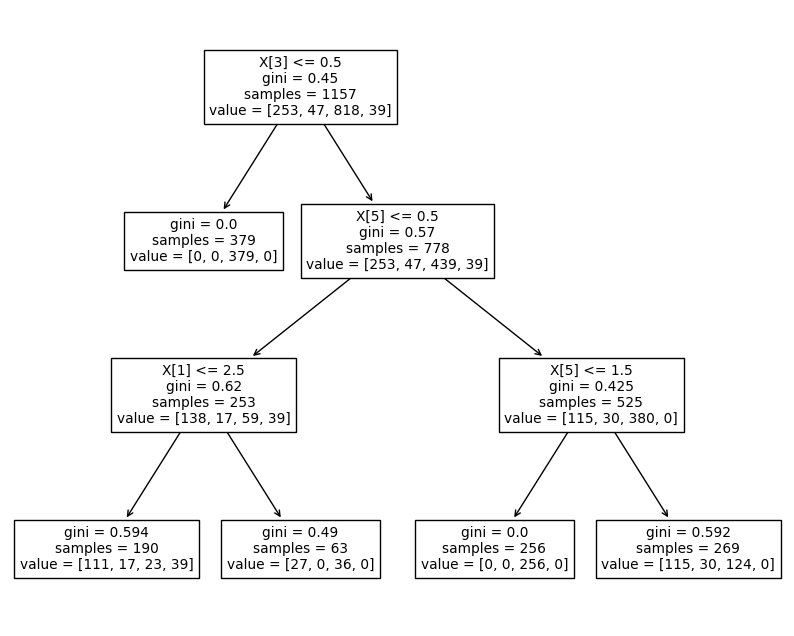

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [22]:
clf_gini.predict([[3,3,0,1,1,2]])

C:\Users\Wafaa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

# Task 1 

In [ ]:
df = pd.read_csv("zoo_python.csv")
df.head()

In [24]:
pd.get_dummies(df.drop("animal", axis=1), drop_first=True).head()

,uniq_id,water_need,food_vegetables
0,1001,500,1
1,1002,600,1
2,1003,550,1
3,1004,300,0
4,1005,320,0
